# Y Gate

This program simulates Y Gate \
Author: Ema Žánová \
Time: 08.12.2025 \
Note: Ensure you have installed the requirements.txt or environment.yml before running this notebook.

## 1. Introduction 
The Y Gate is one of the fundamental single-qubit quantum gates. It performs a specific quantum rotation around the Y axis that combines bit-flip and phase-flip operations, playing a critical role in quantum algorithms and quantum error correction. \
This document explains the logic, significance, and mathematical representation of the Y Gate, providing a clear understanding of its role in quantum circuits and how it is implemented from first principles.

The matrix for the Y gate is:

$$
Y = \begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}
$$



## 2. Set the initial states
In the code cell below, we set all six qbits to initial states: |0>, |1>, |i>, |-i>, |+> and |->, so we can later observe, how the Y gate changes them.

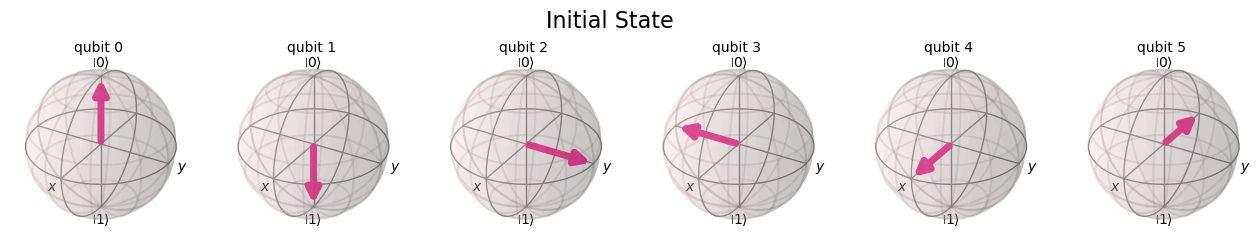

In [133]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# the 0th qubit is set to |0> automatically

circuit.x(qreg_q[1])  # Apply X gate to qubit 1 - set state to |1>

circuit.h(qreg_q[2])  # Apply Hadamard gate to qubit 2 - set to superposition state |+>
circuit.s(qreg_q[2])  # Apply S gate to qubit 2 - set to state |i>

circuit.h(qreg_q[3])  # Apply Hadamard gate to qubit 3 - set to superposition state |+>
circuit.sdg(qreg_q[3])  # Apply S-dagger gate to qubit 3 - step to state |-i>

circuit.h(qreg_q[4])  # Apply Hadamard gate to qubit 4 - set to superposition state |+>
# Apply X and Hadamard gate to qubit 5 - set to superposition state |+>
circuit.x(qreg_q[5])
circuit.h(qreg_q[5])

circuit.barrier()



plot_bloch_multivector(Statevector(circuit), title="Initial State")

## 3. Apply the Y Gate 

Now, we apply the Y Gate to each qbit in the circuit. 

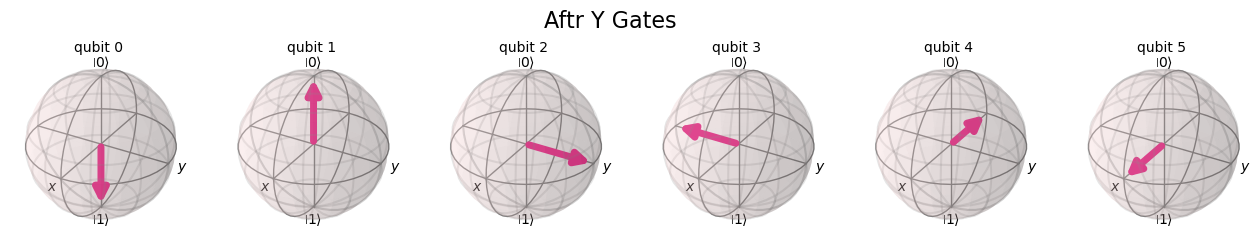

In [134]:
circuit.y(range(6))  # Apply Y gate to all qubits

plot_bloch_multivector(Statevector(circuit), title="Aftr Y Gates")

As you can see, the Y gate rotated the qbit around the Y axis by 180 degrees. Beause the states |i> and |-i> are on the Y axis, they remain unchanged.

Our state of the circuit in ket notation:

In [135]:
Statevector(circuit).draw("latex")

<IPython.core.display.Latex object>

The circuit is rendered below:

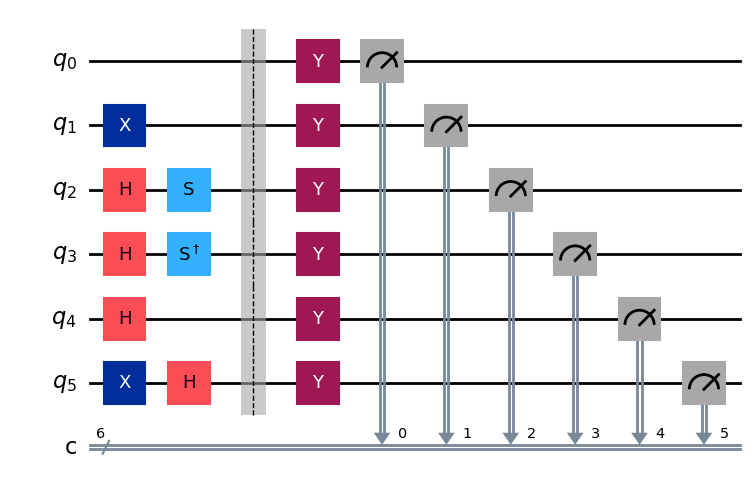

In [136]:
circuit.measure(range(6), range(6))
circuit.draw("mpl")

To clear this up, we will go trough one operator application in more detail.

Step-by-step multiplication of $Y$ and |0\>:

$$
Y = \begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}, \quad
|0\> = \begin{bmatrix}
1 \\
0
\end{bmatrix}
$$

Multiply $Y$ by |0\>:

$$
Y |0\> =
\begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
\begin{bmatrix}
0 \times 1 + (-i) \times 0 \\
i \times 1 + 0 \times 0
\end{bmatrix}
=
\begin{bmatrix}
0 \\
i
\end{bmatrix}
$$


There is summary of the reamining state transitions:

Y |1> =
\begin{bmatrix}
 -i \\
 0
\end{bmatrix}


\
Y |+> =
\begin{bmatrix}
-\frac{\sqrt{2}}{2} i \\
\frac{\sqrt{2}}{2} i
\end{bmatrix}


\
Y |-> =
\begin{bmatrix}
\frac{\sqrt{2}}{2} i \\
\frac{\sqrt{2}}{2} i
\end{bmatrix}


\
Y |i> =
\begin{bmatrix}
1 \\
0
\end{bmatrix}


\
Y |-i> =
\begin{bmatrix}
-1 \\
0
\end{bmatrix}



## 3. Measurment
There is the result after we measure the circuit:

In [137]:
sim = AerSimulator(shots=5000)
result = sim.run(circuit).result()

print(result.get_counts(circuit))

{'010001': 325, '111101': 337, '010101': 317, '101001': 312, '000001': 320, '111001': 306, '110001': 313, '011101': 270, '101101': 301, '011001': 335, '100101': 322, '110101': 305, '100001': 328, '001001': 289, '001101': 299, '000101': 321}


As you can see, the 0th qubit is always 1 sand the 1st qubit is always 0. The rest was in superposition. 